## Multi-class classification

In [1]:
import numpy as np
#Scipy utilise les tableaux et matrices du module NumPy
import scipy as sp
import scipy.io as sio
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report

%matplotlib inline

### Hand-written digits dataset

In [2]:
# Load the hand-written digits dataset
digits = sio.loadmat('C:/Users/Dell/Desktop/AI/5th workshop/data-20190403T132546Z-001/data/ml-classification/data1.mat')

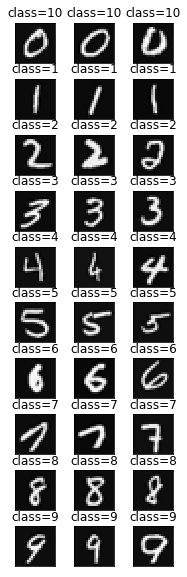

In [7]:
# Plot three samples from each class
n_rows = 10
n_cols = 3

# example np.linspace(2.0, 3.0, num=5)
# array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ])
selected = np.linspace(0, X.shape[0] - 1, n_rows * n_cols, dtype='int16')

plt.figure(figsize=(n_cols, n_rows))
plt.subplots_adjust(hspace=.4)

for i, idx in enumerate(selected):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X[idx].reshape((20,20), order='F'), cmap=plt.cm.gray)
    plt.title(f'class={y[idx]}')
    plt.xticks(())
    plt.yticks(())

### Logistic regression

class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)

*tol* : float, default: 1e-4
Tolerance for stopping criteria.

*C* : float, default: 1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

*solver* : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’.
Algorithm to use in the optimization problem.

- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes. ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

for more details visit this link: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions

In [8]:
# Train a logistic regression classifier with C=1.0 (inverse regularization strength)
clf = LogisticRegression(C=1.0, solver='newton-cg')
clf.fit(x, y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
# Classification accuracy on training set
clf.score(x, y)

0.9446

In [10]:
# Train a logistic regression classifier, running 
# built-in cross validation for selecting the best 
# C value 
clf_cv = LogisticRegressionCV(Cs=[1e-1, 1e0, 1e1], solver='newton-cg')
clf_cv.fit(x, y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=[0.1, 1.0, 10.0], class_weight=None, cv='warn',
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='newton-cg',
           tol=0.0001, verbose=0)

In [13]:
# Classification accuracy on training set 
# using the model that was selected during 
# cross-validation
clf_cv.score(x, y)

0.9408

### Neural networks

In [32]:
# Load the parameters of a pre-trained neural network
weights = sio.loadmat('data/ml-classification/weights.mat')

Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

Theta1.shape, Theta2.shape

((25, 401), (10, 26))

In [33]:
# Number of examples (first dimension of design matrix X)
n_examples = X.shape[0]

# sigmoid function
sigmoid = sp.special.expit

In [34]:
# Input layer data
A1 = np.c_[np.ones(n_examples), X]

In [35]:
# Hidden layer activations
Z2 = A1.dot(Theta1.T)
A2 = np.c_[np.ones(n_examples), sigmoid(Z2)]

In [36]:
# Output layer activations
Z3 = A2.dot(Theta2.T)
A3 = sigmoid(Z3)

In [37]:
# Predicted class is index of highest value per row + 1
y_pred = np.argmax(A3, axis=1) + 1

In [38]:
# Print classification report showing the main classification metrics
print(classification_report(y, y_pred, target_names=['1','2','3','4','5','6','7','8','9','10'], digits=4))

             precision    recall  f1-score   support

          1     0.9684    0.9820    0.9752       500
          2     0.9818    0.9700    0.9759       500
          3     0.9776    0.9600    0.9687       500
          4     0.9699    0.9680    0.9690       500
          5     0.9723    0.9840    0.9781       500
          6     0.9782    0.9860    0.9821       500
          7     0.9778    0.9700    0.9739       500
          8     0.9781    0.9820    0.9800       500
          9     0.9657    0.9580    0.9618       500
         10     0.9822    0.9920    0.9871       500

avg / total     0.9752    0.9752    0.9752      5000

